<a href="https://colab.research.google.com/github/AmitK830/Machine-Learning-Projects/blob/main/HR_Analytics_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load all the Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

# Load the ML libraries

from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

## Description
### Context and Content
### A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

### This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

### The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

## Note:

### The dataset is imbalanced.
### Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
### Missing imputation can be a part of your pipeline as well.

## Load the dataset and preview some of the rows

In [ ]:
df = pd.read_csv("/content/aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Features

### enrollee_id : Unique ID for candidate
### city: City code
### city_ development _index : Developement index of the city (scaled)
### gender: Gender of candidate
### relevent_experience: Relevant experience of candidate
### enrolled_university: Type of University course enrolled if any
### education_level: Education level of candidate
### major_discipline :Education major discipline of candidate
### experience: Candidate total experience in years
### company_size: No of employees in current employer's company
### company_type : Type of current employer
### lastnewjob: Difference in years between previous job and current job
### training_hours: training hours completed
### target: 0 – Not looking for job change, 1 – Looking for a job change

# Finding the missing value in each column

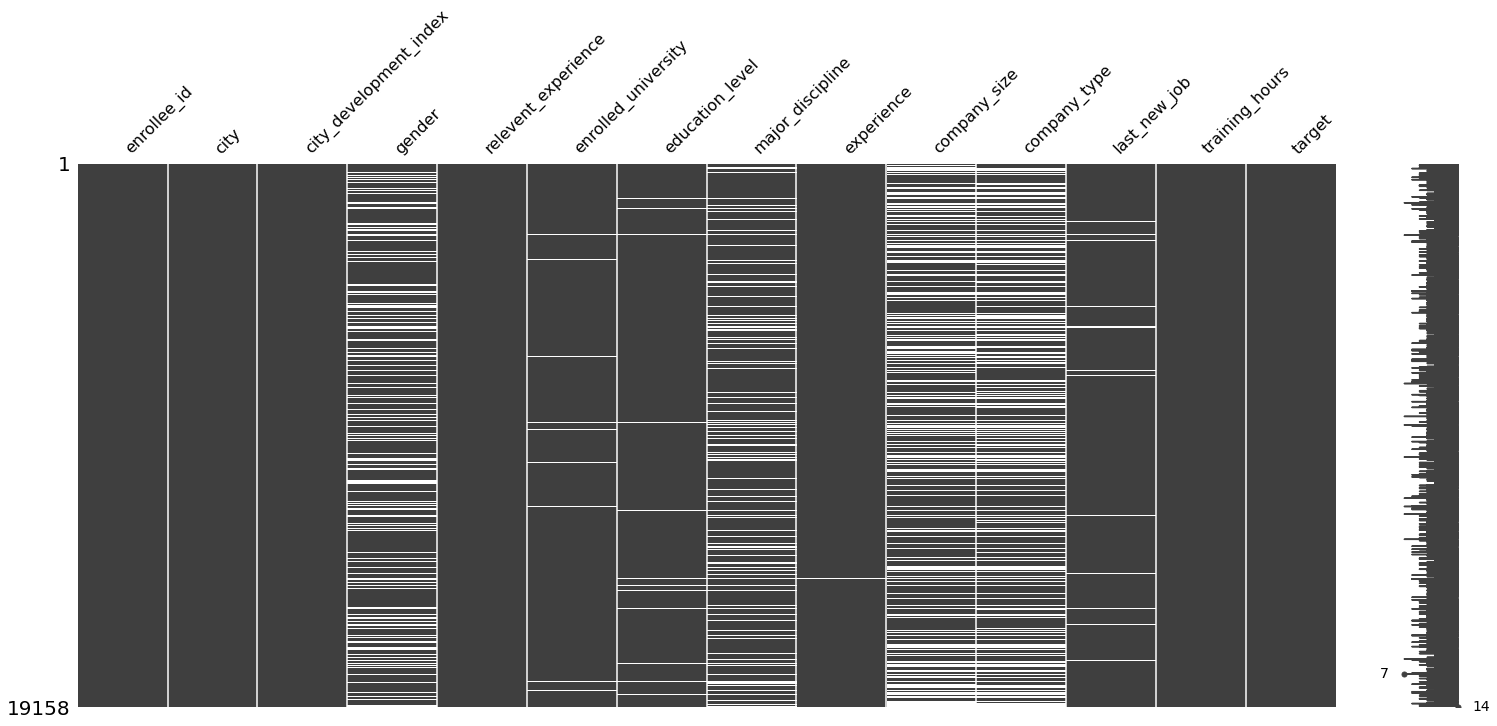

In [ ]:
msn.matrix(df)

### From the above we can see lots of missing value inside the dataframe, shown by "white" line

In [ ]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


## Counting the NaN values

In [ ]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Maximum NULL vales contained in "Company type", "Company_size" & "gender".

In [ ]:
## Shape of dataframe
df.shape

(19158, 14)

## Checking the datatype of features

In [ ]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

### Categorical features

In [ ]:
cat_val= [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_val

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

### Numerical features

In [ ]:
num_val = [feature for feature in df.columns if feature not in cat_val]
num_val

['enrollee_id', 'city_development_index', 'training_hours', 'target']

# Handling Missing values

### Since all columns who contained missing values they are all "category" type, So i will replace with the maximum frequency value.

In [ ]:
# Replacing all missing values with the column maximum frquency value

for feature in cat_val:
  max_freq= df[feature].value_counts().index[0]
  df[feature] = np.where(df[feature].isnull(), max_freq, df[feature])

### Check again for missing values

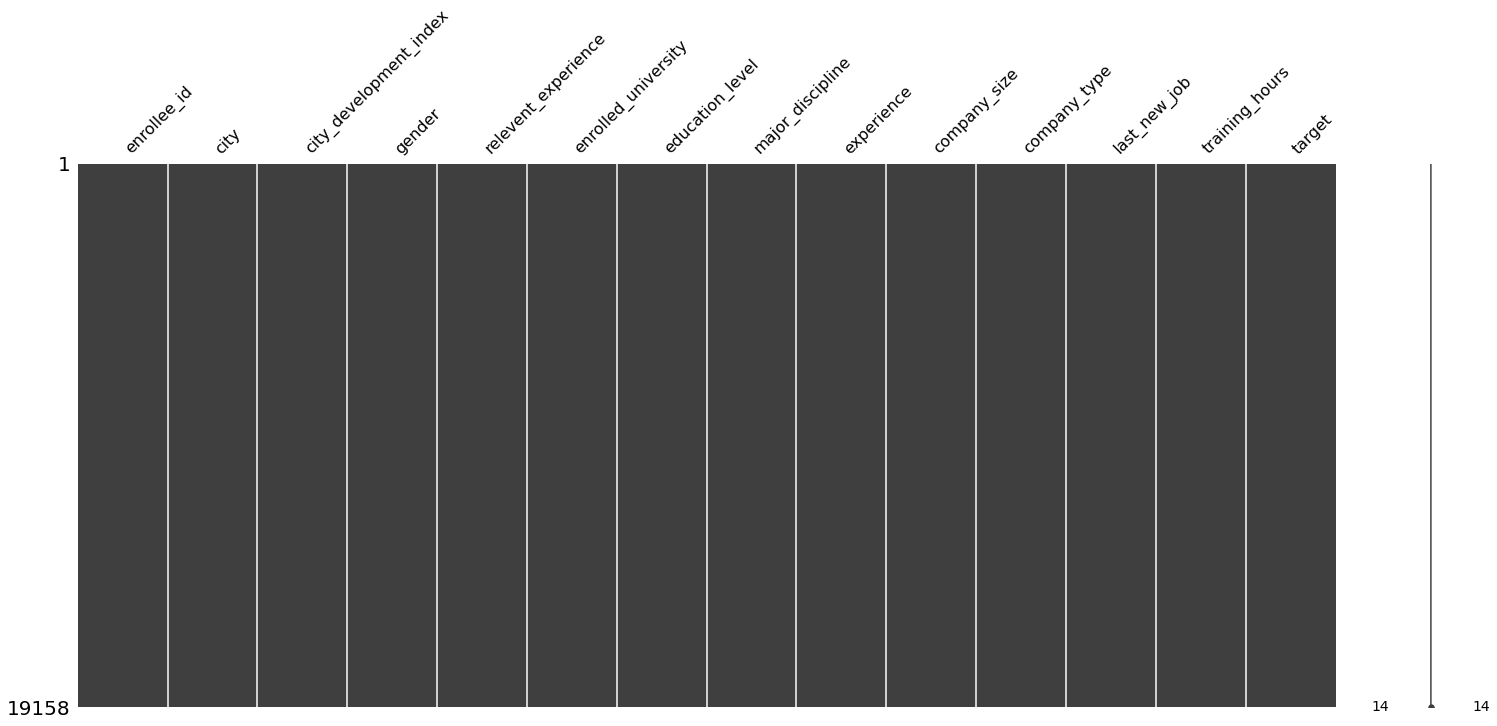

In [ ]:
msn.matrix(df)

### AS we can see No Missing value inside the dataframe

## Handling Outliers in the datset

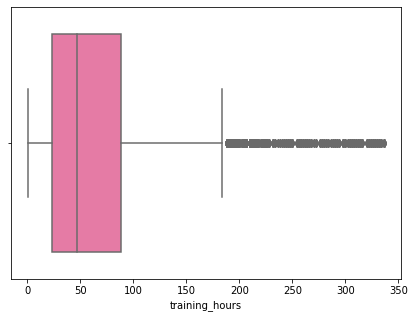

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['training_hours'],palette='RdPu_r')

### Log transformation

In [ ]:
df['training_hours'] = np.log(df['training_hours'])

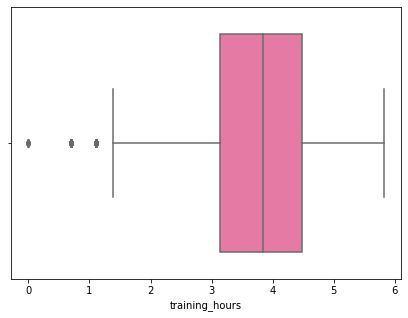

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['training_hours'],palette='RdPu_r')

## Some outliers are left. I will remove this my IQR method

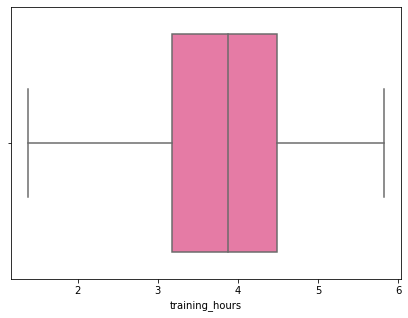

In [ ]:
Q1 =df['training_hours'].describe()[4]
Q3 = df['training_hours'].describe()[6]

IQR = Q3- Q1

max_val = Q3 +1.5*(IQR)
min_val = Q1 - 1.5*(IQR)

df= df[(df['training_hours'] >= min_val) & (df['training_hours'] <= max_val)]

# PLot the boxplot

plt.figure(figsize=(7,5))
sns.boxplot(x=df['training_hours'],palette='RdPu_r')

## No outliers are left

# Data Cleaning is done

# Explaoratory Data Analysis

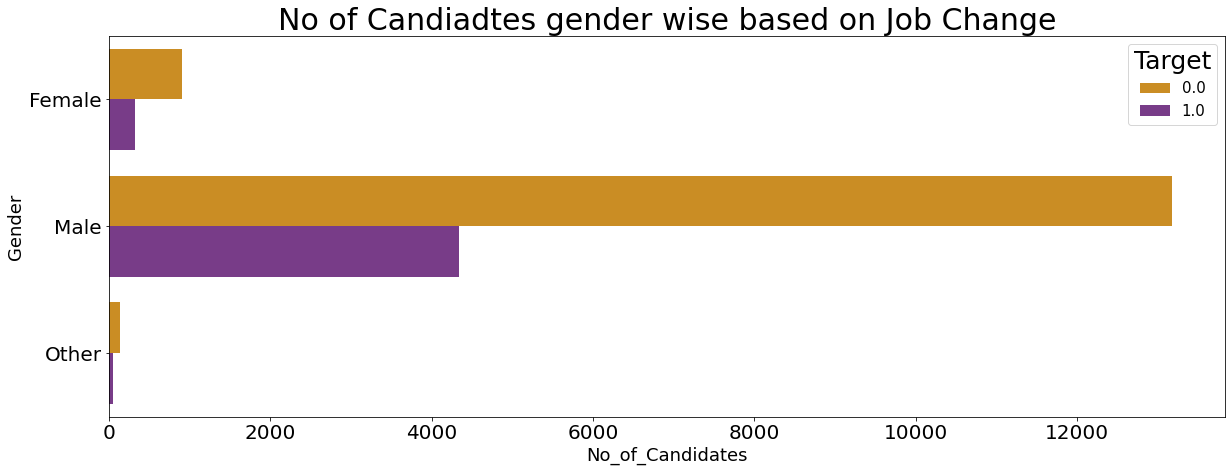

In [ ]:
z= df.groupby(['target', 'gender'])['enrollee_id'].count().reset_index()
plt.figure(figsize=(20,7))
sns.barplot(y= 'gender', x= 'enrollee_id', data=z,hue='target',palette= 'CMRmap_r')
plt.title("No of Candiadtes gender wise based on Job Change", size=30)
plt.xlabel('No_of_Candidates',size=18)
plt.ylabel("Gender", size=18)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,title= 'Target', title_fontsize=25)
plt.show()

### From the above Plot we can see lots of No of Male Candidate looking for the Job_Change more than Female.

## Countplots showing the frequency of each category with respect to Major discipline

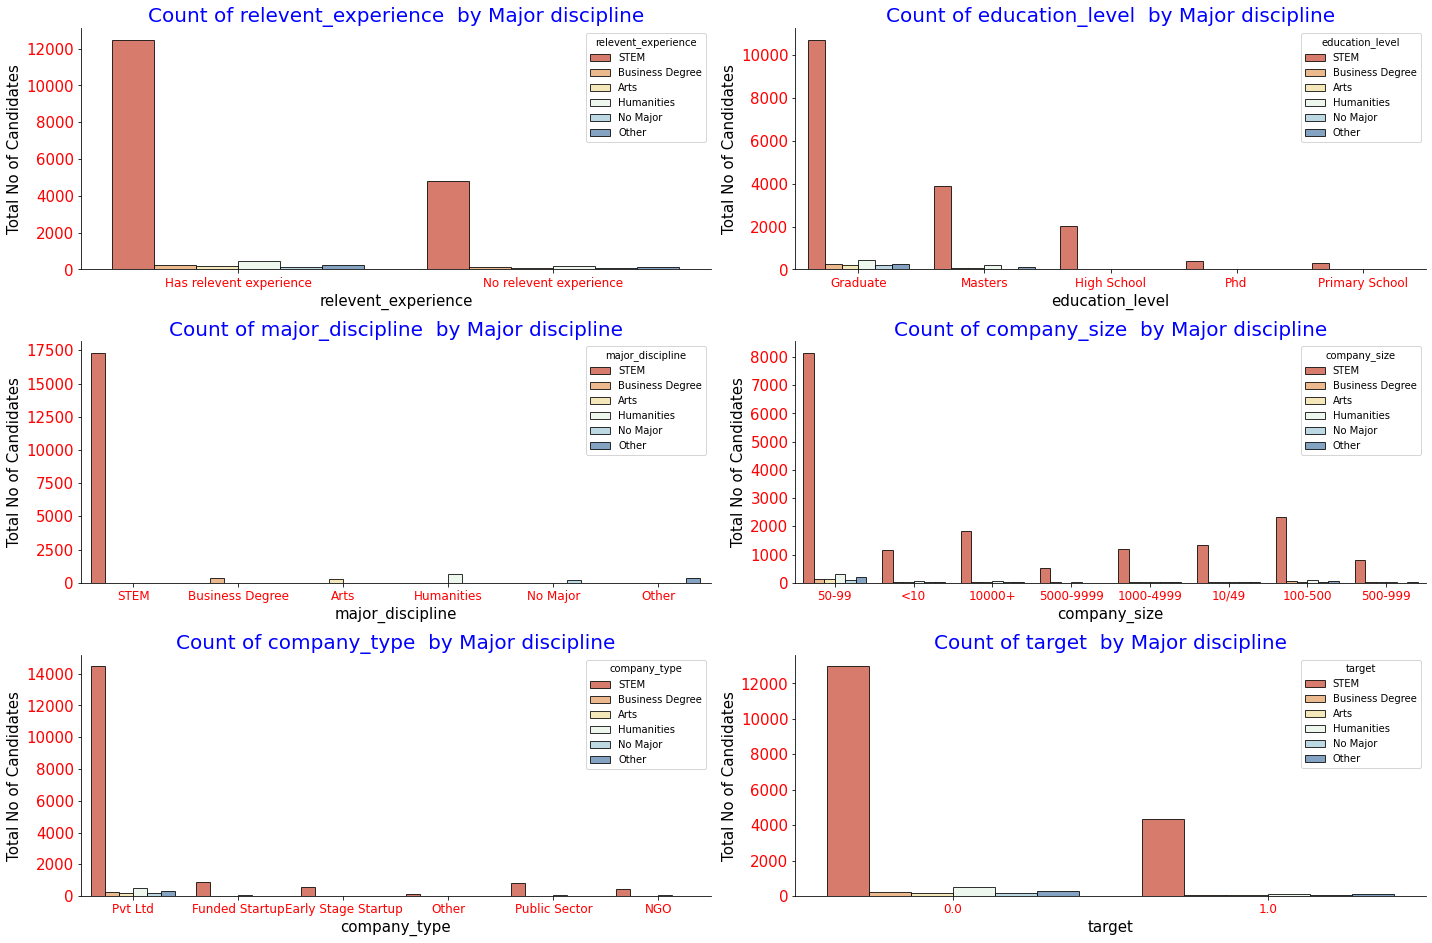

In [ ]:

plt.figure(figsize=[20,17])
plot =["relevent_experience", "education_level","major_discipline","company_size","company_type","target"]
n=1
for p in plot:
    plt.subplot(4,2,n)
    sns.countplot(x=p, hue="major_discipline", edgecolor="black", alpha=0.8, data=df,palette='RdYlBu',)
    sns.despine()
    plt.title("Count of {}  by Major discipline".format(p),color='blue',size=20)
    plt.legend(loc='upper right', fontsize=10,title=p,title_fontsize=10)
    plt.ylabel("Total No of Candidates",size=15)
    plt.xlabel(p,size=15)
    plt.xticks(color='red',size=12)
    plt.yticks(color='red',size=15)
    n=n+1
plt.tight_layout()

plt.show()

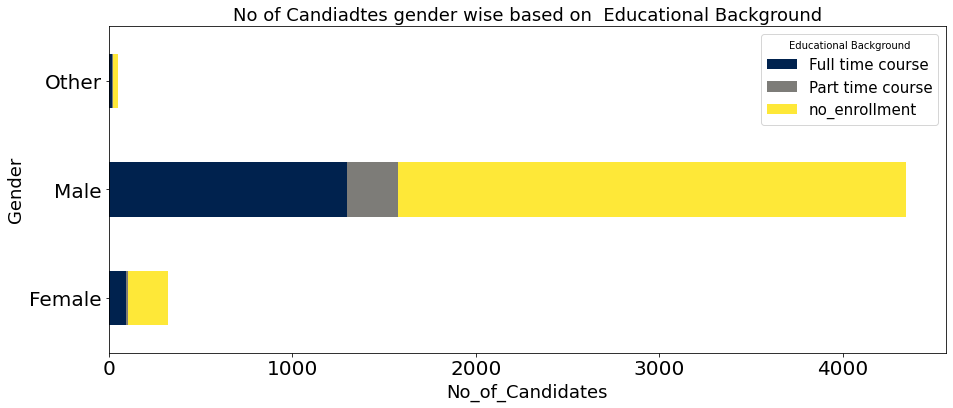

In [ ]:
z= df[df['target'] ==1 ]
z= z.groupby(['gender','enrolled_university']).size().reset_index()
z.columns = ['gender','enrolled_university', 'No_of_Candidates']

z= z.pivot_table(values= 'No_of_Candidates', index= 'enrolled_university',columns= 'gender')

z.T.plot(kind='barh',stacked=True, figsize=(15,6),colormap='cividis')
plt.title("No of Candiadtes gender wise based on  Educational Background", size=18)
plt.xlabel('No_of_Candidates',size=18)
plt.ylabel("Gender", size=18)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,title= 'Educational Background', title_fontsize=10)
plt.show()

### From the above we can see lots of Male Candidates, who are applying for the jobs not taken any Courses in University, followed by Female.

### Male who attended University frequency is more than Female

### Dig deeper, Let's see how many non-enrollement  Candiadates have there Educational background or they donot have any? 

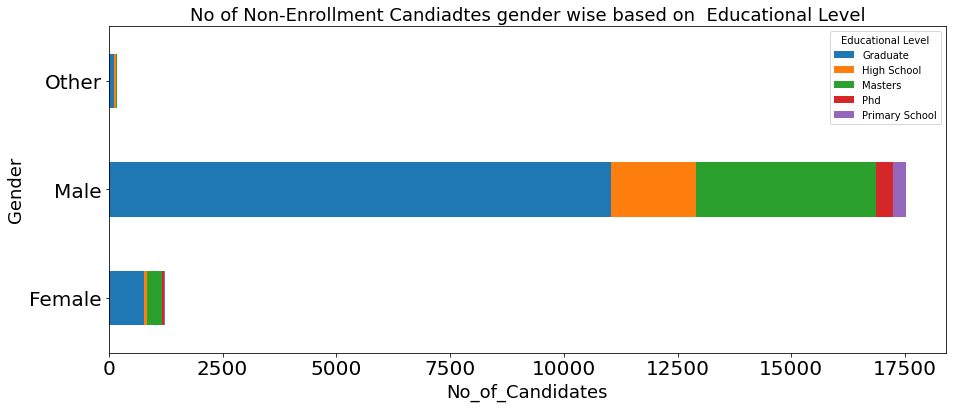

In [ ]:
# We will Foucus on Non-Enrollement

z= df[(df['enrolled_university'] == 'no_enrollment') & df['target'] ==1]
z= df.groupby(['gender','education_level']).size().reset_index()
z.columns = ['gender','education_level', 'No_of_Candidates']

z= z.pivot_table(values= 'No_of_Candidates', index= 'education_level',columns= 'gender')

z.T.plot(kind='barh',stacked=True, figsize=(15,6))
plt.title("No of Non-Enrollment Candiadtes gender wise based on  Educational Level", size=18)
plt.xlabel('No_of_Candidates',size=18)
plt.ylabel("Gender", size=18)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper right',fontsize=10,title= 'Educational Level', title_fontsize=10)
plt.show()

### Conclusion from above plot:--- 
### Male Candidates who are applying for the jobs Maximum haven't enrolled to any courses in University and maximum have "Graduate" degree followed by "Masters"  & "High School"

### Female Candidates  who are applying for the jobs Maximum haven't enrolled to any courses in University and maximum have "Graduate" degree followed by "Masters".

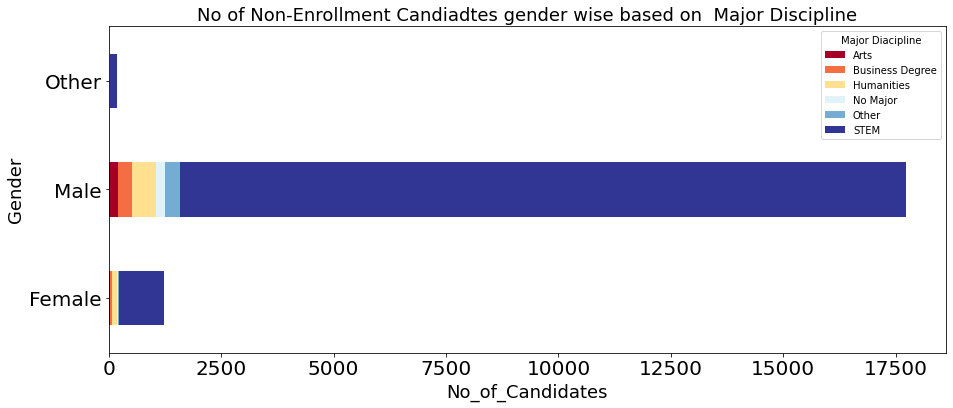

In [ ]:
# We will Foucus on Non-Enrollement
z= df[df['enrolled_university'] == 'no_enrollment']
z= df.groupby(['gender','major_discipline']).size().reset_index()
z.columns = ['gender','major_discipline', 'No_of_Candidates']

z= z.pivot_table(values= 'No_of_Candidates', index= 'major_discipline',columns= 'gender')

z.T.plot(kind='barh',stacked=True, figsize=(15,6),colormap='RdYlBu')
plt.title("No of Non-Enrollment Candiadtes gender wise based on  Major Discipline", size=18)
plt.xlabel('No_of_Candidates',size=18)
plt.ylabel("Gender", size=18)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(loc='upper right',fontsize=10,title= 'Major Diacipline', title_fontsize=10)
plt.show()

### From the above Plot :: --  We can say that Maximum Candiadtes belongs to "STEM" departments for both "Male" & "Female".

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



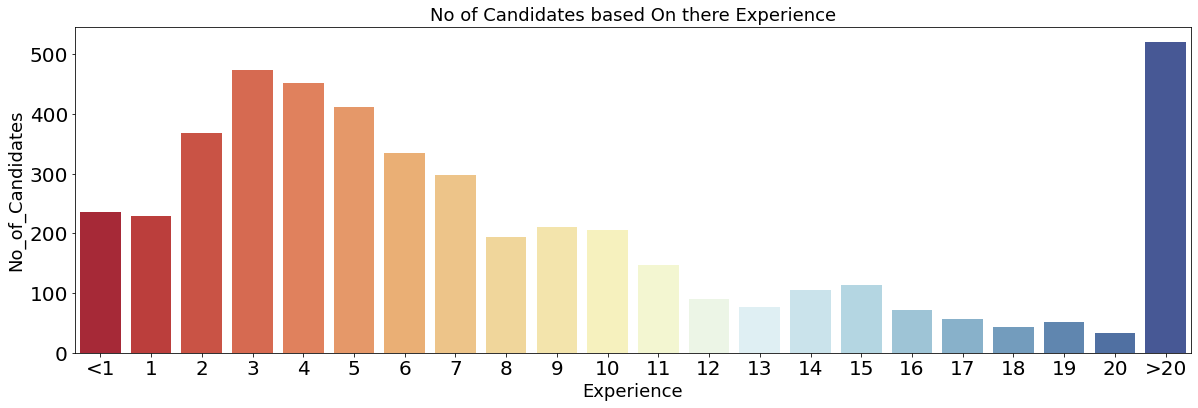

In [ ]:

cats = [ '<1' ,  '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
        '12', '13', '14', '15', '16', '17', '18', '19', '20' , '>20' ]

z= df[df['target'] == 1]
z= z.experience.value_counts().reset_index().sort_values(by='index',ascending=True)
z['index'] = z['index'].astype('str')
z['index'] = pd.Categorical(z['index'],categories= cats, ordered=True,)
z= z.sort_values(by='index')


plt.figure(figsize=(20,6))
sns.barplot('index', 'experience', data =z,palette='RdYlBu')
plt.title("No of Candidates based On there Experience", size=18)
plt.ylabel('No_of_Candidates',size=18)
plt.xlabel("Experience", size=18)
plt.xticks(size=20)
plt.yticks(size=20)

plt.show()


### From the above we can see No of Candidates who applying for the job have  experience is greater than 20 years are more in numbers.

### And also there are more  no of candidates, who applying for the job have experience 3,4 and 5 years.

##   Our Analysis Focus on  Experience > 20 years Candidates

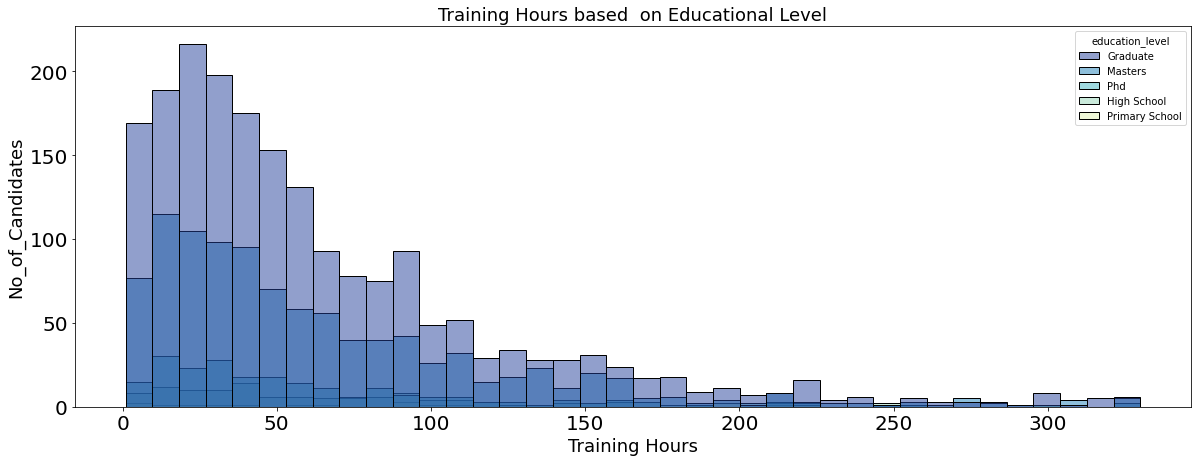

In [ ]:


z= df[df['experience'] == '>20']

plt.figure(figsize=(20,7))
sns.histplot(data = z, hue='education_level' ,x ='training_hours',palette='YlGnBu_r')


plt.title("Training Hours based  on Educational Level", size=18)
plt.ylabel('No_of_Candidates',size=18)
plt.xlabel("Training Hours", size=18)
plt.xticks(size=20)
plt.yticks(size=20)

plt.show()

### From the above we can see Candiadtes Who have Experience  >  20 years, Only "Masters" & "Graduate" Level candidates have spend more training hours.

,enrollee_id,city,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,target,gender_Male,gender_Other,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_size_labels
0,8949,city_103,0.920,Has relevent experience,Graduate,>20,1,3.583519,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3
1,29725,city_40,0.776,No relevent experience,Graduate,15,>4,3.850148,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3
2,11561,city_21,0.624,No relevent experience,Graduate,5,never,4.418841,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,3


In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,3.583519,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,3.850148,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,4.418841,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,3.951244,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,2.079442,0.0


# Feature Engineering- Encoding

In [ ]:
# Dummy Encoding

df= pd.get_dummies(data= df,columns=['gender','company_type', 'enrolled_university', 'major_discipline'],drop_first=True,)

## Encoding "company_size" Manually

In [ ]:
# Handling company_size columns
orders = {'50-99' : 3, '100-500': 4, '10000+' : 8, '10/49' : 2, '1000-4999' : 6, '<10' : 1, '500-999':5,
         '5000-9999' : 7}

df['company_size_labels'] = df['company_size'].map(orders)

# Remove comapny_size from the dataset

df = df.drop(columns=['company_size'])


In [ ]:
df.head(2)

,enrollee_id,city,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,target,gender_Male,gender_Other,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_size_labels
0,8949,city_103,0.920,Has relevent experience,Graduate,>20,1,3.583519,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3
1,29725,city_40,0.776,No relevent experience,Graduate,15,>4,3.850148,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3


## Hash Encoding

In [ ]:
! pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [ ]:
# Hash Encoding for 'City'

import category_encoders as cat_encoders

city_encoder = cat_encoders.HashingEncoder(cols=['city'])

city_he = city_encoder.fit_transform(df['city'], df['target'])

df_1 =df.drop(columns=['city'])

new_df = pd.concat([df_1, city_he],axis=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [ ]:
new_df.head(3)

,enrollee_id,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,target,gender_Male,gender_Other,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_size_labels,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,8949,0.920,Has relevent experience,Graduate,>20,1,3.583519,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3,0,1,0,0,0,0,0,0
1,29725,0.776,No relevent experience,Graduate,15,>4,3.850148,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3,0,0,0,0,0,0,1,0
2,11561,0.624,No relevent experience,Graduate,5,never,4.418841,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,1,0,0


## Label Encoding of Ordinal Variables 

In [ ]:
## Ordinal features =   relevent experience,education_level, experience, last_new_job

from sklearn.preprocessing import LabelEncoder as le
from collections import defaultdict
d = defaultdict(le)

ordinal_df = new_df[['relevent_experience','education_level','experience','last_new_job']].apply(lambda x: d[x.name].fit_transform(x),axis=0)

# Remove ordinal features from original dataset


new_df= new_df.drop(columns=['relevent_experience', 'education_level', 'experience', 'last_new_job'])
# Add to dataframe
train_df= pd.concat([new_df,ordinal_df],axis=1)

train_df.columns

Index(['enrollee_id', 'city_development_index', 'training_hours', 'target',
       'gender_Male', 'gender_Other', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_labels', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4',
       'col_5', 'col_6', 'col_7', 'relevent_experience', 'education_level',
       'experience', 'last_new_job'],
      dtype='object')

In [ ]:
train_df.head()

,enrollee_id,city_development_index,training_hours,target,gender_Male,gender_Other,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_size_labels,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,relevent_experience,education_level,experience,last_new_job
0,8949,0.920,3.583519,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,21,0
1,29725,0.776,3.850148,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3,0,0,0,0,0,0,1,0,1,0,6,4
2,11561,0.624,4.418841,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,1,0,0,1,0,15,5
3,33241,0.789,3.951244,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,20,5
4,666,0.767,2.079442,0.0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,2,21,3


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Target')

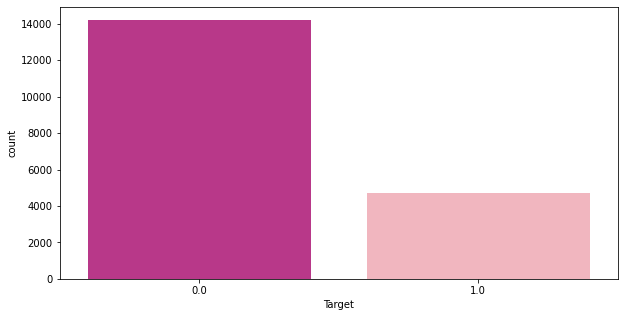

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(train_df['target'],palette='RdPu_r')
plt.xlabel('Target',size=10)

### From the above plot we can see Imbalanced dataset. In which 14000 rows contains 1's & approx 5000 contains 0's.
## I will balance the dataset first, because without balancing it will lead the model to Overfitting.

## Change the datatype of 'city_development_index' & training_hours to integer by multiply by 10

In [ ]:
train_df['city_development_index']= train_df['city_development_index']*10
train_df['city_development_index'] = train_df['city_development_index'].astype('int')

train_df['training_hours']= train_df['training_hours']*10
train_df['training_hours'] = train_df['training_hours'].astype('int')

# Convert datatype of target column
train_df['target'] = train_df['target'].astype('int')

In [ ]:
train_df.head(2)

,enrollee_id,city_development_index,training_hours,target,gender_Male,gender_Other,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_size_labels,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,relevent_experience,education_level,experience,last_new_job
0,8949,9,35,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,0,21,0
1,29725,7,38,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,3,0,0,0,0,0,0,1,0,1,0,6,4


In [ ]:
# Make X & y
X= train_df.drop(labels= ['target', 'enrollee_id'],axis=1)
y= train_df['target'] 

## Balancing the dataset using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X= train_df.drop(labels= ['target', 'enrollee_id'],axis=1)
y= train_df['target'] 

counter = Counter(y)
print('Before: ',counter)

# Oversampling the train dataset using SMOTE
smt = SMOTE()
new_X, new_y = smt.fit_resample(X,y)

counter = Counter(new_y)
print('After: ',counter)

Before:  Counter({0: 14216, 1: 4718})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



After:  Counter({1: 14216, 0: 14216})


In [ ]:
print(new_X.shape,new_y.shape)

(28432, 29) (28432,)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



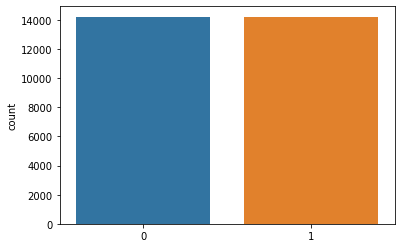

In [ ]:
sns.countplot(new_y)

## From the above plot we can see data is perfectly balanced

## Split the dataset into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(new_X ,new_y ,test_size=0.25,random_state=1)

print("Size of train set", x_train.shape,y_train.shape)
print("Size of test set", x_test.shape,y_test.shape)

Size of train set (21324, 29) (21324,)
Size of test set (7108, 29) (7108,)


## Pre-Processing the training & test set

In [ ]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
pd.DataFrame(x_train).dtypes

## Finding the Accuracy of training set using different model

In [ ]:
# Import functions to compute accuracy and split data

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Set seed for reproducibility
SEED = 1


# Instantiate individual classifiers

classifier = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=SEED)
svm_class= SVC(kernel='rbf',random_state=SEED)
RF_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Define a list called classifier that contains the tuples (classifier_name, classifier)

classifiers = [('Logistic Regression', classifier), ('K Nearest Neighbours', knn), ('Classification Tree', dt),('SVM_Classifier', svm_class),
               ('Random_Forest', RF_classifier)]

# Iterate over the defined list of tuples containing the classifiers

for clf_name, clf in classifiers:
    
    #fit clf to the training set
    clf.fit(x_train, y_train)
    
    # Predict the labels of the training set
    x_pred = clf.predict(x_train)
    
    # Predicting the labels of the test set
    y_pred = clf.predict(x_test)
    
    # Evaluate the accuracy of clf on the test set
    print('{:s} training set accuracy : {:.3f}'.format(clf_name, accuracy_score(y_train,x_pred)))
    print('{:s} test set accuracy : {:.3f}'.format(clf_name, accuracy_score(y_test,y_pred)))

Logistic Regression training set accuracy : 0.792
Logistic Regression test set accuracy : 0.792
K Nearest Neighbours training set accuracy : 0.857
K Nearest Neighbours test set accuracy : 0.795
Classification Tree training set accuracy : 0.990
Classification Tree test set accuracy : 0.788
SVM_Classifier training set accuracy : 0.809
SVM_Classifier test set accuracy : 0.805
Random_Forest training set accuracy : 0.979
Random_Forest test set accuracy : 0.823


## From the above we can see Random Forest gives the Maximum training set & test set accuracy buy there is Overfitting in the model.

## Grid Search CV for Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dc= DecisionTreeClassifier()

param_dict= {'criterion': ['gini', 'entropy'], 'max_depth' : range(1,20), "min_samples_split" : range(1,10),
             'min_samples_leaf' : range(1,5)}

grid_search = GridSearchCV(estimator = dc, param_grid = param_dict,cv = 10,n_jobs = -1 )
grid_search.fit(x_train,y_train)

y_pred = grid_search.predict(x_test)
# Finding the best parameter
print(grid_search.best_params_)

# Finding the best estimator
print(grid_search.best_estimator_)

# Finding the Score

print("Accuracy of training set:",  grid_search.best_score_)

print('Accuracy Score of test set: ', accuracy_score(y_test,y_pred))

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy of training set: 0.7906109347526453
Accuracy Score of test set:  0.7862971299943725


## Bagging for Decision Tree

In [ ]:
# Initiate DT Classifer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

SEED =1



dt = DecisionTreeClassifier(criterion='entropy',max_depth= 15,min_samples_leaf= 2,min_samples_split=2 ,random_state=SEED)

# Initiate the Bagging classifer

bc =  BaggingClassifier(base_estimator= dt, n_estimators=300, n_jobs=-1)

# Fit 'bc' to training set
bc.fit(x_train,y_train)

# Predict test set labels

y_pred = bc.predict(x_test)

# Predicting the training set

X_pred = bc.predict(x_train)

# Evaluate & print test set accuracy

train_accuracy = accuracy_score(y_train,X_pred)
test_accuracy =accuracy_score(y_test,y_pred)

print("Accuracy of training set of Bagging Classifer : {:.3f}".format(train_accuracy) )
print("Accuracy of  test set Bagging Classifer : {:.3f}".format(test_accuracy))

Accuracy of training set of Bagging Classifer : 0.888
Accuracy of  test set Bagging Classifer : 0.817


# Bagging classifer with Decision tree gives the 81% Accuracy rate on the Test set

## Adaboost For Decision Tree

In [ ]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score,accuracy_score



# Set seed for reproducibility
SEED = 1


# Instantiate a Decision-tree 'dt'
dt =DecisionTreeClassifier(criterion='entropy',max_depth= 15,min_samples_leaf= 2,min_samples_split=2,random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt , n_estimators=500)

# Fit 'adb_clf' to the training set
adb_clf.fit(x_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(x_test)[:,1]

# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

# Accuracy for Training set
print("Accuracy Score of Training Set", accuracy_score(y_train,adb_clf.predict(x_train)))

# Accuracy for Test set
print("Accuracy Score of Test Set", accuracy_score(y_test,adb_clf.predict(x_test)))


ROC AUC score: 0.89
Accuracy Score of Training Set 0.990620896642281
Accuracy Score of Test Set 0.8242824985931345


## GridSearch CV in Random Forest 

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

model = RandomForestClassifier(random_state=30,)
parameters = { "n_estimators"      : [250, 300],
           "criterion"         : ["gini", "entropy"],
           
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "max_features"      : [3, 5],
           "bootstrap": [True, False]}
grid_search = GridSearchCV(estimator= model, param_grid= parameters, scoring='accuracy', n_jobs=-1, cv=10,)

grid_search.fit(x_train,y_train)


y_pred = grid_search.predict(x_test)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Parameters:", best_parameters)


print("Accuracy score of training set ", accuracy_score(y_train,grid_search.predict(x_train)))
print('Accuracy of test set :', accuracy_score(y_test,y_pred))

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy score of training set  0.9441005439879947
Accuracy of test set : 0.8303320202588632


## Bagging for RandomForest

In [ ]:
# Initiate Random Forest Classifer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

SEED =1



rf = RandomForestClassifier(criterion='entropy', max_depth= 20, max_features=5,min_samples_split=2,n_estimators=100 ,random_state=SEED)

# Initiate the Bagging classifer

bc =  BaggingClassifier(base_estimator= rf, n_estimators=100)

# Fit 'bc' to training set
bc.fit(x_train,y_train)

# Predict test set labels

y_pred = bc.predict(x_test)

# Predicting the training set

X_pred = bc.predict(x_train)

# Evaluate & print test set accuracy

train_accuracy = accuracy_score(y_train,X_pred)
test_accuracy =accuracy_score(y_test,y_pred)

print("Accuracy of training set of Bagging Classifer : {:.3f}".format(train_accuracy) )
print("Accuracy of  test set Bagging Classifer : {:.3f}".format(test_accuracy))

## Adaboost for Random Forest based on Hyper-parameter

In [ ]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score



# Set seed for reproducibility
SEED = 1


# Instantiate a RF-tree 'dt'
rf =RandomForestClassifier(criterion='entropy', max_depth= 20, max_features=5,min_samples_split=2,n_estimators=100,random_state=SEED)

# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=rf , n_estimators=150)

# Fit 'adb_clf' to the training set
adb_clf.fit(x_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(x_test)[:,1]

# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print adb_clf_roc_auc_score
print('ROC AUC score of Test set: {:.2f}'.format(adb_clf_roc_auc_score))


# Test Set Score
print("Accuracy Score of Test Set", accuracy_score(y_test,adb_clf.predict(x_test)))

ROC AUC score: 0.91
Accuracy Score of Training Set 0.9904333145751266
Accuracy Score of Test Set 0.8368036015756893


## AdaBoost give the Maximum ROC-AUC-Score == 91% 
## And Accuracy Score 83%

# Predicting the test set data

### Load the Test set data

In [ ]:
 df_test = pd.read_csv("/content/aug_test.csv")
 df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


### Checking for Missing values

In [ ]:
df_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [ ]:
df_test.shape

(2129, 13)

### Extract Categorical & Numerical Variables

In [ ]:
cat_feature = [feature for feature in df_test.columns if df_test[feature].dtypes == 'O']
num_feature = [feature for feature in df_test.columns if feature not in cat_feature ]



###  Handling Missing value in test dataset

In [ ]:
# Replacing all missing values with the column maximum frquency value

for feature in cat_feature:
  max_freq= df_test[feature].value_counts().index[0]
  df_test[feature] = np.where(df_test[feature].isnull(), max_freq, df_test[feature])

### Check Again for NULL values

In [ ]:
df_test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

# Things I will not do with Test dataset
### 1. I will not remove Outliers.
### 2. No balancing of dataset


In [ ]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Pvt Ltd,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,50-99,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,STEM,<1,50-99,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [ ]:
df_test['company_size'].value_counts()

50-99        960
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

## Feature Engineering of Test dataset

In [ ]:
# Handling company_size columns
orders = {'50-99' : 3, '100-500': 4, '10000+' : 8, '10/49' : 2, '1000-4999' : 6, '<10' : 1, '500-999':5,
         '5000-9999' : 7}

df_test['company_size_labels'] = df_test['company_size'].map(orders)

# Remove comapny_size from the dataset

df_test = df_test.drop(columns=['company_size'])

### Hash Encoding

In [ ]:
# Hash Encoding for 'City'

import category_encoders as cat_encoders

city_encoder = cat_encoders.HashingEncoder(cols=['city'])

city_test = city_encoder.fit_transform(df_test['city'])

df_2 =df_test.drop(columns=['city'])

new_df_test = pd.concat([df_2, city_test],axis=1)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



### Dummy Encoding

In [ ]:
# Dummy Encoding

new_df_test= pd.get_dummies(data= new_df_test,columns=['gender','company_type', 'enrolled_university', 'major_discipline'],drop_first=True,)


### Ordinal Encoding

In [ ]:
## Ordinal features =   relevent experience,education_level, experience, last_new_job

from sklearn.preprocessing import LabelEncoder as le
from collections import defaultdict
d = defaultdict(le)

ordinal_df_test = new_df_test[['relevent_experience','education_level','experience','last_new_job']].apply(lambda x: d[x.name].fit_transform(x),axis=0)

# Remove ordinal features from original dataset


new_df_test= new_df_test.drop(columns=['relevent_experience', 'education_level', 'experience', 'last_new_job'])
# Add to dataframe
test_df= pd.concat([new_df_test,ordinal_df_test],axis=1)

test_df.columns

Index(['enrollee_id', 'city_development_index', 'training_hours',
       'company_size_labels', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4',
       'col_5', 'col_6', 'col_7', 'gender_Male', 'gender_Other',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'relevent_experience', 'education_level', 'experience', 'last_new_job'],
      dtype='object')

### Change the datatype of 'city_development_index'

In [ ]:
test_df['city_development_index']= test_df['city_development_index']*10
test_df['city_development_index'] = test_df['city_development_index'].astype('int')



## Remove & Save Enrollee_id 

In [ ]:
id = test_df['enrollee_id']
test_df = test_df.drop(['enrollee_id'],axis=1)


### Standarize the Test dataset based on the training set

In [ ]:
# Scalrize the Test set based on the training set

transform_df = scaler.transform(test_df)

## Predicting the test set probablity based on AdaBoost (Random Forest Classifer)

In [ ]:
# Predict the test set probabilities 

y_pred_proba_test = adb_clf.predict_proba(transform_df)[:,1]



## Combine the id and probablity series

In [ ]:
target_test= pd.DataFrame(y_pred_proba_test)
target_test.columns= ['Target_Probablity']
id_test = pd.DataFrame(id)
id_test.columns= ['id']

In [ ]:
final_prediction= pd.concat([id_test,target_test],axis=1)
final_prediction= final_prediction.sort_values('id').reset_index()
final_prediction.drop('index',axis=1,inplace=True)
final_prediction

,id,Target_Probablity
0,3,0.436239
1,28,0.445867
2,30,0.423106
3,37,0.455702
4,40,0.417392
...,...,...
2124,33300,0.390746
2125,33308,0.503753
2126,33316,0.433811
2127,33343,0.452744


## Saving the CSV file of Final Prediction

In [ ]:
final_prediction.to_csv('final_prediction.csv')

# Thank You